In [82]:
#import schtuff
from geopy.extra.rate_limiter import RateLimiter
from geopy import Nominatim
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#set jp options
pd.set_option('display.max_colwidth', 300)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
#set base coordinates in USA
base = locator.geocode('USA')
base_coords = base[-1]

In [169]:
#f(x) to generate a new base map
def generateBaseMap(default_location=base_coords, default_zoom_start=5):
    base_map = Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [170]:
folium.__version__

'0.11.0+20.gb70efc6'

In [26]:
#import data
df = pd.read_csv('../Capstone_Project_I/data/vets2.csv',  encoding="ISO-8859-1")

In [27]:
tribes = df[(df['Tribe'] != 'Non-SOF')&(df['Tribe'] != 'SOF Enabler')]

In [30]:
round(tribes.Tribe.value_counts()/len(tribes) * 100, 2)

Green Beret      27.19
SEAL             20.03
Pilot            15.78
Ranger            8.36
NEOD              6.90
SWCC              5.84
Raider            5.17
Helo Pilot        3.71
PJ                2.65
CCT               1.86
PSYOPS            0.93
Recon             0.80
SOWT              0.27
EOD               0.27
JCU               0.13
Civil Affairs     0.13
Name: Tribe, dtype: float64

In [33]:
df.Branch.value_counts()/len(df.Branch) * 100

Army            41.304348
Navy            40.389016
Marine Corps     9.725400
Air Force        8.123570
Coast Guard      0.457666
Name: Branch, dtype: float64

In [44]:
percent(df[df['Branch'] == 'Navy']['Tribe'].value_counts())

SEAL           42.78
Pilot          20.11
NEOD           14.73
SWCC           12.46
Non-SOF         7.65
SOF Enabler     1.42
Helo Pilot      0.57
JCU             0.28
Name: Tribe, dtype: float64

In [43]:
def percent(df):
    divisor = sum(df)
    return round(df/sum(df) * 100, 2)

In [45]:
branches = df['Branch'].unique()

In [60]:
tribes = tribes[tribes['Branch'] != 'Coast Guard']
tribes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 873
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      753 non-null    object 
 1   Birthdate                               78 non-null     object 
 2   CreatedDate                             753 non-null    object 
 3   Location                                753 non-null    object 
 4   City                                    753 non-null    object 
 5   State                                   753 non-null    object 
 6   How_did_you_hear_about_Elite_Meet       541 non-null    object 
 7   Your_transition_to_civilian_life_begin  452 non-null    object 
 8   Undergrad                               640 non-null    object 
 9   Undergraduate_School                    687 non-null    object 
 10  Undergrad_major                         686 non-null    object

In [67]:
percent(tribes[tribes['Branch'] == 'Navy']['Tribe'].value_counts()).values

array([47.04, 22.12, 16.2 , 13.71,  0.62,  0.31])

In [116]:
branches = branches[:4]

In [ ]:
plt.style.use('grayscale')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']

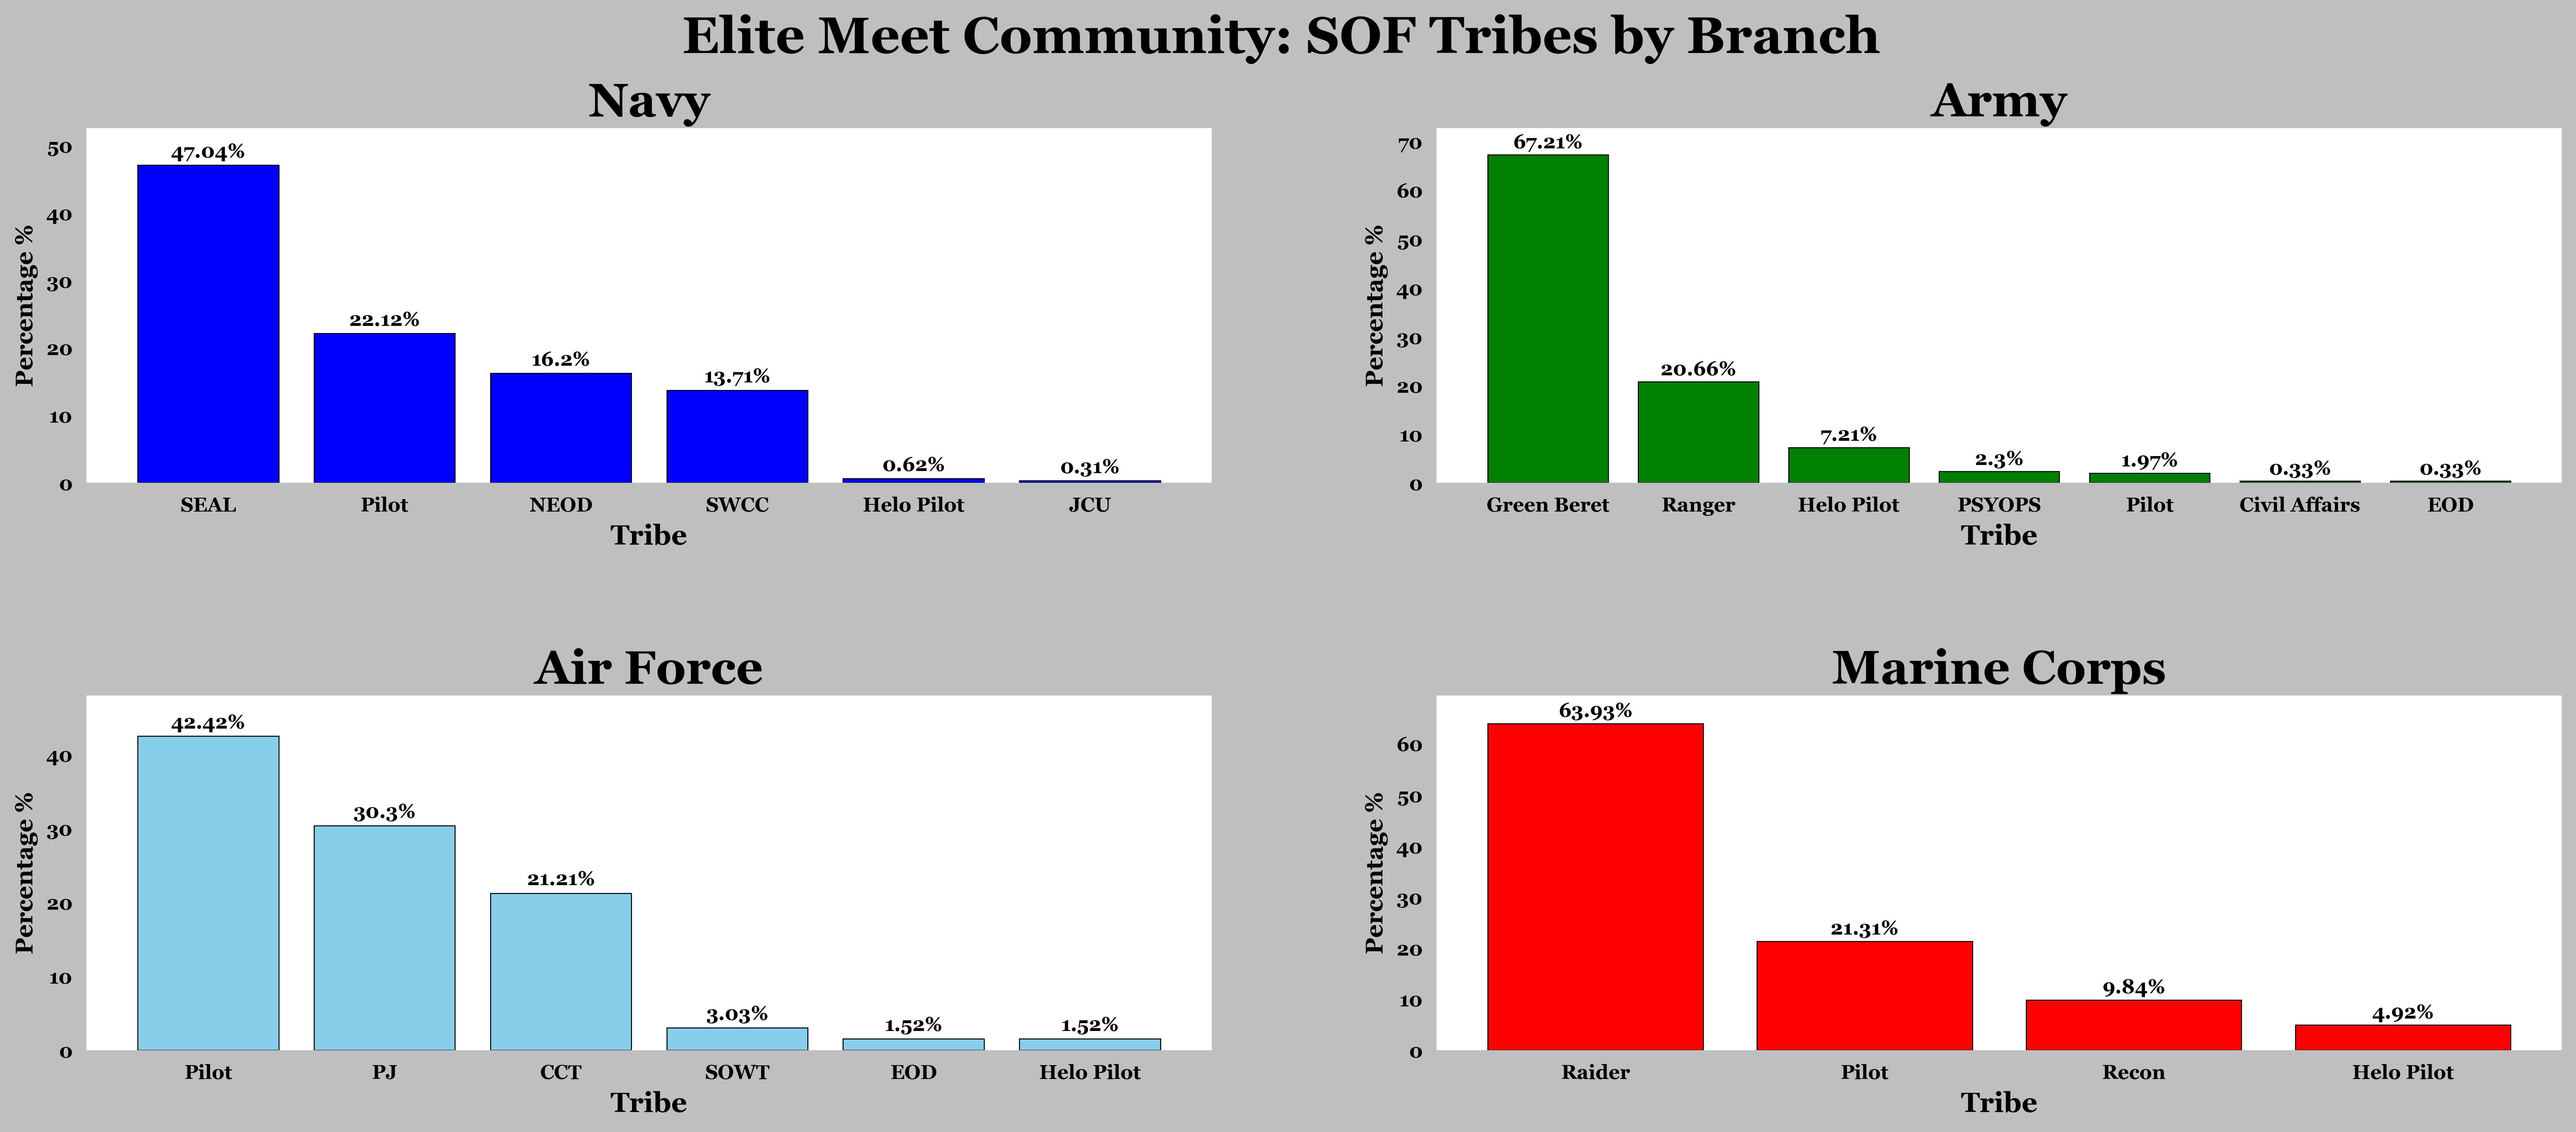

In [166]:
fig = plt.figure(figsize=(20,8))
suptitle = fig.suptitle('Elite Meet Community: SOF Tribes by Branch', fontweight='bold', fontsize=26)

colors = ['blue', 'green', 'skyblue', 'red']
for i, branch in enumerate(branches):
    ax = fig.add_subplot(2,2,i+1)
    ax.grid(False)
    df = percent(tribes[tribes['Branch'] == branch]['Tribe'].value_counts())
    _ = plt.bar(x=df.index, height=df.values, data=df, color=colors[i], edgecolor='black')
    rects = _.patches
    
    # Make some labels.
    labels = [f"{value}%" for value in df.values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        txt = plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5 , label,
                ha='center', va='bottom', fontweight='bold')
    _ = fig.subplots_adjust(left=None, bottom=None, right=None, wspace=None, hspace=0.6)
    title = ax.set_title(f'{branch}', fontsize=24, fontweight='bold')
    xticks = plt.xticks(fontweight='bold')
    yticks = plt.yticks(fontweight='bold')
    xlabel = plt.xlabel('Tribe', fontweight='bold', fontsize=14)
    ylabel = plt.ylabel('Percentage %', fontweight='bold')
    ylim = plt.ylim(0,max(df.values) + 5.5)


In [58]:
plt.style.use('fivethirtyeight')

In [139]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']